This project works on analyzing the sentiment of the News Data given a dataset of news articles with their headlines for a set of companies. In the following code, I have worked on analyzing the sentiment for companies such as, Apple Inc, Amazon Inc, Bank of America, Best Buy, Citigroup Inc, The Boeing Company

In [247]:
# pip install yahoo_fin

In [248]:
# pip install yfinance

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('all')
import warnings
warnings.filterwarnings("ignore")

In [250]:
from google.colab import drive
import pandas as pd
import os
import pickle

drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/news_data/'
folders = os.listdir(path)
dict_files = {}
word_cloud = []

for folder in folders:
    folder_path = os.path.join(path, folder)
    dict_files[folder] = os.listdir(folder_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**For Apple Inc Ticker**

In [251]:
# for Stock Price Estimation and News related to Apple, limiting the company list to two - Apple Inc and Apple Inc_
c_name = ['Apple Inc']
print('\n\nThe news data available for Apple for 30 days, and consolidated by news per company is',len(dict_files['Apple Inc']), 'in number')



The news data available for Apple for 30 days, and consolidated by news per company is 27 in number


In [252]:
# function to read csvs and perform sentiment analysis on its contents, function returns a dataframe appended with the mean sentiment scores for the day with the date
def myread_csv(c_name):
  df_A = pd.DataFrame()
  df = pd.DataFrame()
  
  analyzer = SentimentIntensityAnalyzer()
  file_path = os.path.join(path, c_name)
  iter = 0
  for i in dict_files[c_name]:
    
    csv_path = os.path.join(file_path, i)
    df_temp = pd.read_csv(csv_path, encoding = 'ISO-8859-1',low_memory=False)
    date = i.split('.')[0]
    df_temp["Date"] = date
    df = pd.concat([df, df_temp])
    df['Concat'] = df["Title"] + df["Description"]

    scores = df['Concat'].apply(analyzer.polarity_scores).tolist()
    df_scores = pd.DataFrame(scores)
    if iter==1:
      print("For the following data: \n", df['Concat'])
      print("\nSample values of Polarity Scores: \n",df_scores)
    iter+=1
    mean = round(df_scores['compound'].mean(), 2)
    
    new_row = {'Date': date, 'Mean': mean}
    df_A = df_A.append(new_row, ignore_index=True)
  return df_A

In [253]:
# Sentiment Scores for every day data within the directory - 'Apple Inc'

AAPL_Sentiment_Scores = pd.DataFrame()
for i in c_name:
  AAPL_Sentiment_Scores = AAPL_Sentiment_Scores.append(myread_csv(i))
AAPL_Sentiment_Scores = AAPL_Sentiment_Scores.reset_index(drop=True)
AAPL_Sentiment_Scores.index = AAPL_Sentiment_Scores.index + 1

print('\n\nHere are the Mean Sentiment Polarity Scores for News with respect to Apple\n')
AAPL_Sentiment_Scores

For the following data: 
 0    Consumer Cloud Services Global Market Report 2...
0    Apple to host annual developers' conference fr...
1    Elon Musk, Steve Wozniak sign letter calling f...
2    The best disk clone apps for Mac in 2023A hand...
3    Global Subscription-based Gaming Market to 203...
4    Samsung Display has one less market rival with...
5    BYD Defers US Debut, Alibaba's Split Sparks La...
6    Whatâs new for IT in the latest Mac, iPhone,...
7    Apple expected to unveil its $3,000 mixed-real...
8    Are US Sanctions On China Working? China Tech ...
Name: Concat, dtype: object

Sample values of Polarity Scores: 
      neg    neu    pos  compound
0  0.000  0.870  0.130    0.6597
1  0.000  1.000  0.000    0.0000
2  0.039  0.904  0.057    0.2500
3  0.000  0.906  0.094    0.6486
4  0.000  0.939  0.061    0.2960
5  0.087  0.913  0.000   -0.5423
6  0.031  0.929  0.040    0.1027
7  0.000  0.955  0.045    0.3818
8  0.000  1.000  0.000    0.0000
9  0.046  0.780  0.173    0.5

,Date,Mean
1,2023-03-11,0.66
2,2023-03-29,0.23
3,2023-03-27,0.18
4,2023-03-25,0.20
5,2023-03-17,0.22
6,2023-03-06,0.23
7,2023-03-14,0.19
8,2023-04-02,0.22
9,2023-03-28,0.22
10,2023-03-07,0.20


In [254]:
# importing stock price data from yahoo finance
from yahoo_fin import stock_info as si
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

# taking the start and end dates as per the news data
start_date = min(AAPL_Sentiment_Scores['Date'])
end_date = max(AAPL_Sentiment_Scores['Date'])

# getting the stock price data for Apple
ticker = "AAPL"
stock_data_all = si.get_data(ticker, start_date=start_date, end_date=end_date, interval='1d')

In [255]:
# resetting index
stock_data_all = stock_data_all.reset_index()
stock_data_all.index = stock_data_all.index + 1
stock_data_all

,index,open,high,low,close,adjclose,volume,ticker
1,2023-03-06,153.789993,156.300003,153.460007,153.830002,153.830002,87558000,AAPL
2,2023-03-07,153.699997,154.029999,151.130005,151.600006,151.600006,56182000,AAPL
3,2023-03-08,152.809998,153.470001,151.830002,152.869995,152.869995,47204800,AAPL
4,2023-03-09,153.559998,154.539993,150.229996,150.589996,150.589996,53833600,AAPL
5,2023-03-10,150.210007,150.940002,147.610001,148.500000,148.500000,68572400,AAPL
6,2023-03-13,147.809998,153.139999,147.699997,150.470001,150.470001,84457100,AAPL
7,2023-03-14,151.279999,153.399994,150.100006,152.589996,152.589996,73695900,AAPL
8,2023-03-15,151.190002,153.250000,149.919998,152.990005,152.990005,77167900,AAPL
9,2023-03-16,152.160004,156.460007,151.639999,155.850006,155.850006,76161100,AAPL
10,2023-03-17,156.080002,156.740005,154.279999,155.000000,155.000000,98944600,AAPL


In [256]:
# resetting column names and date format
new_column = {'index':'Date', 'open':'Open','high':'High', 'low':'Low','close':'Close','adjclose':'Adjclose','volume':'Volume','ticker':'Ticker'}
stock_data_all = stock_data_all.rename(columns=new_column)
import datetime
for i in stock_data_all['Date']:
  date_obj = i
  date_str = date_obj.strftime('%Y-%m-%d')
  stock_data_all['Date'] = date_str

In [257]:
for i in AAPL_Sentiment_Scores['Date']:
  for j in stock_data_all['Date']:
    # print(i,j)
    if i == str(j):
      AAPL_Sentiment_Scores['Open'] = stock_data_all['Open']
      AAPL_Sentiment_Scores['Adjclose'] = stock_data_all['Adjclose']
      AAPL_Sentiment_Scores['High'] = stock_data_all['High']
      AAPL_Sentiment_Scores['Low'] = stock_data_all['Low']
      AAPL_Sentiment_Scores['Close'] = stock_data_all['Close']
      AAPL_Sentiment_Scores['Volume'] = stock_data_all['Volume']   

print('\n\nThe Sentiment Scores Concatenated with the Stock Price Data for Apple\n')
AAPL_Sentiment_Scores = AAPL_Sentiment_Scores.dropna()
AAPL_Sentiment_Scores



The Sentiment Scores Concatenated with the Stock Price Data for Apple



,Date,Mean,Open,Adjclose,High,Low,Close,Volume
1,2023-03-11,0.66,153.789993,153.830002,156.300003,153.460007,153.830002,87558000.0
2,2023-03-29,0.23,153.699997,151.600006,154.029999,151.130005,151.600006,56182000.0
3,2023-03-27,0.18,152.809998,152.869995,153.470001,151.830002,152.869995,47204800.0
4,2023-03-25,0.20,153.559998,150.589996,154.539993,150.229996,150.589996,53833600.0
5,2023-03-17,0.22,150.210007,148.500000,150.940002,147.610001,148.500000,68572400.0
6,2023-03-06,0.23,147.809998,150.470001,153.139999,147.699997,150.470001,84457100.0
7,2023-03-14,0.19,151.279999,152.589996,153.399994,150.100006,152.589996,73695900.0
8,2023-04-02,0.22,151.190002,152.990005,153.250000,149.919998,152.990005,77167900.0
9,2023-03-28,0.22,152.160004,155.850006,156.460007,151.639999,155.850006,76161100.0
10,2023-03-07,0.20,156.080002,155.000000,156.740005,154.279999,155.000000,98944600.0


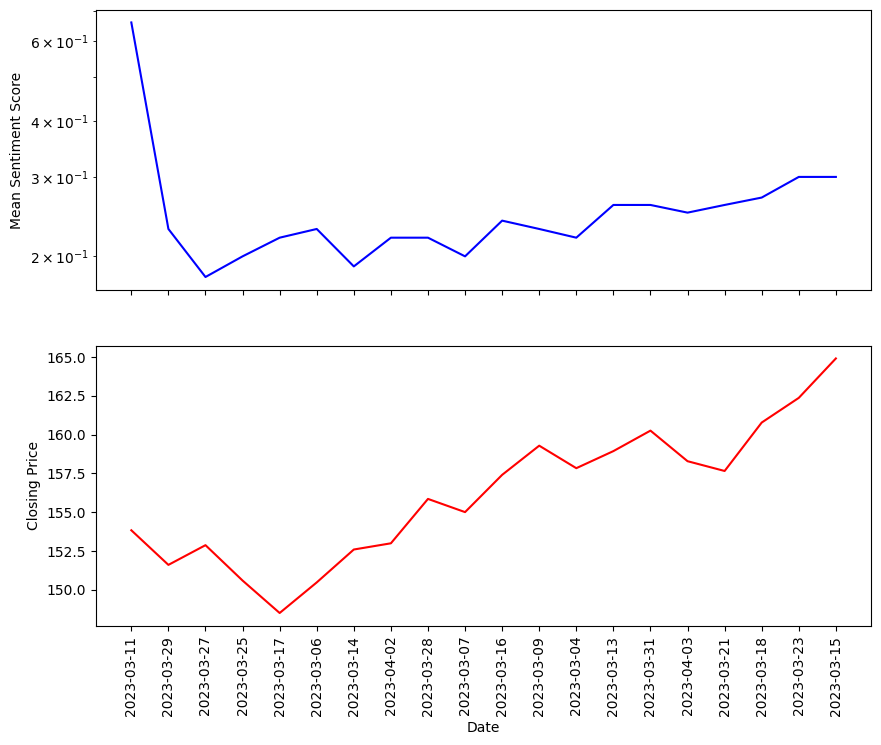

In [258]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8)) 

ax1.plot(AAPL_Sentiment_Scores['Date'], AAPL_Sentiment_Scores['Mean'], color='blue')
ax1.set_yscale('log')
ax1.set_ylabel('Mean Sentiment Score')

ax2.plot(AAPL_Sentiment_Scores['Date'], AAPL_Sentiment_Scores['Adjclose'], color='red')
ax2.set_ylabel('Closing Price')

plt.xlabel('Date')

plt.xticks(rotation='vertical')

plt.show()

**For Amazon Inc Ticker**

In [259]:
c_name = ['Amazon.com, Inc']
print('\nThe news data available for Amazon for 30 days, and consolidated by news per day is',len(dict_files["Amazon.com, Inc"]),'in number')


The news data available for Amazon for 30 days, and consolidated by news per day is 24 in number


In [260]:
# Sentiment Scores for every day data within the directory - 'Amazon Inc'

AMZN_Sentiment_Scores = pd.DataFrame()
for i in c_name:
  AMZN_Sentiment_Scores = AMZN_Sentiment_Scores.append(myread_csv(i))
AMZN_Sentiment_Scores = AMZN_Sentiment_Scores.reset_index(drop=True)
AMZN_Sentiment_Scores.index = AMZN_Sentiment_Scores.index + 1

print('\n\nHere are the Mean Sentiment Polarity Scores for News with respect to Amazon\n')
AMZN_Sentiment_Scores

For the following data: 
 0    AI Stocks To Watch In 2023Put eyes on these AI...
1    Else Nutrition Reports an 82% increase in Fisc...
0    ICT Investment In Government Global Market Rep...
1    Laird Superfood, Inc. (AMEX:LSF) Q4 2022 Earni...
2    Amazon class action lawsuit goes after company...
Name: Concat, dtype: object

Sample values of Polarity Scores: 
      neg    neu    pos  compound
0  0.000  1.000  0.000    0.0000
1  0.000  0.938  0.062    0.3182
2  0.000  0.796  0.204    0.7717
3  0.000  0.849  0.151    0.6705
4  0.059  0.836  0.105    0.1280


Here are the Mean Sentiment Polarity Scores for News with respect to Amazon



,Date,Mean
1,2023-03-31,0.16
2,2023-03-17,0.38
3,2023-03-14,0.53
4,2023-03-16,0.50
5,2023-03-07,0.42
6,2023-03-30,0.25
7,2023-03-18,0.26
8,2023-03-06,0.31
9,2023-03-13,0.34
10,2023-03-28,0.34


In [261]:
# importing stock price data from yahoo finance
from yahoo_fin import stock_info as si
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

# taking the start and end dates as per the news data
start_date = min(AMZN_Sentiment_Scores['Date'])
end_date = max(AMZN_Sentiment_Scores['Date'])

# getting the stock price data for Amazon
ticker = "AMZN"
stock_data_all = si.get_data(ticker, start_date=start_date, end_date=end_date, interval='1d')

In [262]:
# resetting index
stock_data_all = stock_data_all.reset_index()
stock_data_all.index = stock_data_all.index + 1
stock_data_all

,index,open,high,low,close,adjclose,volume,ticker
1,2023-03-06,95.190002,96.550003,93.739998,93.750000,93.750000,52112400,AMZN
2,2023-03-07,94.059998,95.089996,92.779999,93.550003,93.550003,49100700,AMZN
3,2023-03-08,93.599998,94.169998,92.180000,93.919998,93.919998,44899100,AMZN
4,2023-03-09,93.680000,96.209999,92.180000,92.250000,92.250000,56218700,AMZN
5,2023-03-10,92.669998,93.570000,90.250000,90.730003,90.730003,69827500,AMZN
6,2023-03-13,89.970001,94.019997,88.120003,92.430000,92.430000,72397100,AMZN
7,2023-03-14,93.830002,95.070000,92.709999,94.879997,94.879997,60912700,AMZN
8,2023-03-15,93.220001,96.669998,93.070000,96.199997,96.199997,70731800,AMZN
9,2023-03-16,95.750000,100.989998,95.610001,100.040001,100.040001,84446900,AMZN
10,2023-03-17,99.790001,100.660004,97.459999,98.949997,98.949997,87300200,AMZN


In [263]:
# resetting column names and date format
new_column = {'index':'Date', 'open':'Open','high':'High', 'low':'Low','close':'Close','adjclose':'Adjclose','volume':'Volume','ticker':'Ticker'}
stock_data_all = stock_data_all.rename(columns=new_column)
import datetime
for i in stock_data_all['Date']:
  date_obj = i
  date_str = date_obj.strftime('%Y-%m-%d')
  stock_data_all['Date'] = date_str

In [264]:
for i in AMZN_Sentiment_Scores['Date']:
  for j in stock_data_all['Date']:
    # print(i,j)
    if i == str(j):
      AMZN_Sentiment_Scores['Open'] = stock_data_all['Open']
      AMZN_Sentiment_Scores['Adjclose'] = stock_data_all['Adjclose']
      AMZN_Sentiment_Scores['High'] = stock_data_all['High']
      AMZN_Sentiment_Scores['Low'] = stock_data_all['Low']
      AMZN_Sentiment_Scores['Close'] = stock_data_all['Close']
      AMZN_Sentiment_Scores['Volume'] = stock_data_all['Volume']   

print('\n\nThe Sentiment Scores Concatenated with the Stock Price Data for Amazon\n')
AMZN_Sentiment_Scores = AMZN_Sentiment_Scores.dropna()
AMZN_Sentiment_Scores



The Sentiment Scores Concatenated with the Stock Price Data for Amazon



,Date,Mean,Open,Adjclose,High,Low,Close,Volume
1,2023-03-31,0.16,95.190002,93.750000,96.550003,93.739998,93.750000,52112400.0
2,2023-03-17,0.38,94.059998,93.550003,95.089996,92.779999,93.550003,49100700.0
3,2023-03-14,0.53,93.599998,93.919998,94.169998,92.180000,93.919998,44899100.0
4,2023-03-16,0.50,93.680000,92.250000,96.209999,92.180000,92.250000,56218700.0
5,2023-03-07,0.42,92.669998,90.730003,93.570000,90.250000,90.730003,69827500.0
6,2023-03-30,0.25,89.970001,92.430000,94.019997,88.120003,92.430000,72397100.0
7,2023-03-18,0.26,93.830002,94.879997,95.070000,92.709999,94.879997,60912700.0
8,2023-03-06,0.31,93.220001,96.199997,96.669998,93.070000,96.199997,70731800.0
9,2023-03-13,0.34,95.750000,100.040001,100.989998,95.610001,100.040001,84446900.0
10,2023-03-28,0.34,99.790001,98.949997,100.660004,97.459999,98.949997,87300200.0


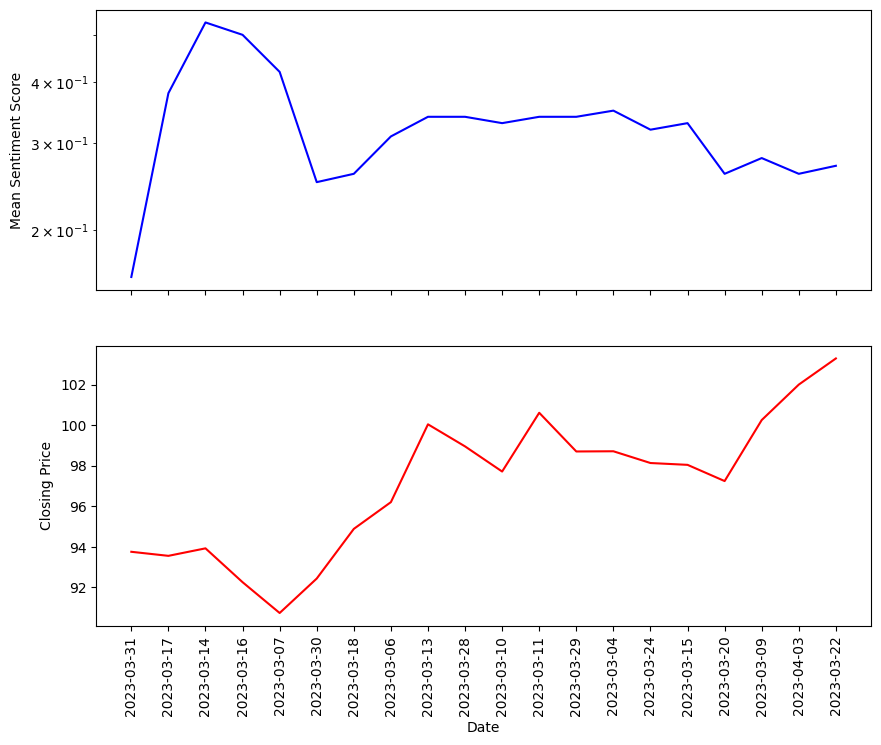

In [265]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8)) 

ax1.plot(AMZN_Sentiment_Scores['Date'], AMZN_Sentiment_Scores['Mean'], color='blue')
ax1.set_yscale('log')
ax1.set_ylabel('Mean Sentiment Score')

ax2.plot(AMZN_Sentiment_Scores['Date'], AMZN_Sentiment_Scores['Adjclose'], color='red')
ax2.set_ylabel('Closing Price')

plt.xlabel('Date')

plt.xticks(rotation='vertical')

plt.show()

**For Bank of America Corporation Ticker**

In [266]:
# for Stock Price Estimation and News related to Apple, limiting the company list to two - Apple Inc and Apple Inc_
c_name = ['Bank of America Corporation']
print('\nThe news data available for Bank of America for 30 days, and consolidated by news per company is',len(dict_files['Bank of America Corporation']), 'in number')


The news data available for Bank of America for 30 days, and consolidated by news per company is 24 in number


In [267]:
# Sentiment Scores for every day data within the directory - 'Bank of America Corporation'

BAC_Sentiment_Scores = pd.DataFrame()
for i in c_name:
  BAC_Sentiment_Scores = BAC_Sentiment_Scores.append(myread_csv(i))
BAC_Sentiment_Scores = BAC_Sentiment_Scores.reset_index(drop=True)
BAC_Sentiment_Scores.index = BAC_Sentiment_Scores.index + 1

print('\n\nHere are the Mean Sentiment Polarity Scores for News with respect to Bank of America\n')
BAC_Sentiment_Scores

For the following data: 
 0    Again? Government socialism saves reckless cap...
0    US regulators say deposits into First Republic...
1    North Holdings 3 Oy extends the offer period o...
2    Impersonation attacks leverage Silicon Valley ...
3    Wall Street rides to the rescue as 11 banks pl...
4    CIO Leadership: HMG Strategy Celebrates Extrao...
5    Small banks vs. big banks: Where should you pu...
6    Wall Street giants move to rescue First Republ...
7    10 Best Canadian Gold Stocks To Buy NowIn this...
8    First Republic Stock Crashes But Bounces Back ...
9    TD announces new interim financed emissions ta...
Name: Concat, dtype: object

Sample values of Polarity Scores: 
       neg    neu    pos  compound
0   0.206  0.772  0.022   -0.8519
1   0.000  0.881  0.119    0.4939
2   0.000  0.951  0.049    0.1280
3   0.208  0.792  0.000   -0.8689
4   0.000  0.821  0.179    0.8271
5   0.000  0.859  0.141    0.8126
6   0.157  0.843  0.000   -0.6380
7   0.073  0.787  0.139    0.361

,Date,Mean
1,2023-03-21,-0.85
2,2023-03-16,0.19
3,2023-03-13,0.04
4,2023-03-28,0.01
5,2023-03-08,0.01
6,2023-03-19,0.03
7,2023-03-11,0.08
8,2023-03-22,0.12
9,2023-03-23,0.11
10,2023-03-18,0.12


In [268]:
# importing stock price data from yahoo finance
from yahoo_fin import stock_info as si
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

# taking the start and end dates as per the news data
start_date = min(BAC_Sentiment_Scores['Date'])
end_date = max(BAC_Sentiment_Scores['Date'])

# getting the stock price data for Bank of America
ticker = "BAC"
stock_data_all = si.get_data(ticker, start_date=start_date, end_date=end_date, interval='1d')

In [269]:
# resetting index
stock_data_all = stock_data_all.reset_index()
stock_data_all.index = stock_data_all.index + 1
stock_data_all

,index,open,high,low,close,adjclose,volume,ticker
1,2023-03-06,34.240002,34.560001,33.990002,34.090000,34.090000,36646700,BAC
2,2023-03-07,33.849998,33.900002,32.799999,33.000000,33.000000,52855300,BAC
3,2023-03-08,32.660000,32.970001,32.439999,32.560001,32.560001,40045600,BAC
4,2023-03-09,32.279999,32.389999,30.309999,30.540001,30.540001,112457900,BAC
5,2023-03-10,30.320000,31.040001,28.920000,30.270000,30.270000,165330900,BAC
6,2023-03-13,28.920000,29.719999,27.870001,28.510000,28.510000,218403300,BAC
7,2023-03-14,29.990000,30.090000,28.469999,28.760000,28.760000,154255800,BAC
8,2023-03-15,27.879999,28.559999,27.680000,28.490000,28.490000,131104400,BAC
9,2023-03-16,28.379999,29.469999,28.110001,28.969999,28.969999,108348800,BAC
10,2023-03-17,28.660000,28.660000,27.620001,27.820000,27.820000,130665500,BAC


In [270]:
# resetting column names and date format
new_column = {'index':'Date', 'open':'Open','high':'High', 'low':'Low','close':'Close','adjclose':'Adjclose','volume':'Volume','ticker':'Ticker'}
stock_data_all = stock_data_all.rename(columns=new_column)
import datetime
for i in stock_data_all['Date']:
  date_obj = i
  date_str = date_obj.strftime('%Y-%m-%d')
  stock_data_all['Date'] = date_str

In [271]:
for i in BAC_Sentiment_Scores['Date']:
  for j in stock_data_all['Date']:
    # print(i,j)
    if i == str(j):
      BAC_Sentiment_Scores['Open'] = stock_data_all['Open']
      BAC_Sentiment_Scores['Adjclose'] = stock_data_all['Adjclose']
      BAC_Sentiment_Scores['High'] = stock_data_all['High']
      BAC_Sentiment_Scores['Low'] = stock_data_all['Low']
      BAC_Sentiment_Scores['Close'] = stock_data_all['Close']
      BAC_Sentiment_Scores['Volume'] = stock_data_all['Volume']   

print('\n\nThe Sentiment Scores Concatenated with the Stock Price Data for Bank of America\n')
BAC_Sentiment_Scores = BAC_Sentiment_Scores.dropna()
BAC_Sentiment_Scores



The Sentiment Scores Concatenated with the Stock Price Data for Bank of America



,Date,Mean,Open,Adjclose,High,Low,Close,Volume
1,2023-03-21,-0.85,34.240002,34.090000,34.560001,33.990002,34.090000,36646700.0
2,2023-03-16,0.19,33.849998,33.000000,33.900002,32.799999,33.000000,52855300.0
3,2023-03-13,0.04,32.660000,32.560001,32.970001,32.439999,32.560001,40045600.0
4,2023-03-28,0.01,32.279999,30.540001,32.389999,30.309999,30.540001,112457900.0
5,2023-03-08,0.01,30.320000,30.270000,31.040001,28.920000,30.270000,165330900.0
6,2023-03-19,0.03,28.920000,28.510000,29.719999,27.870001,28.510000,218403300.0
7,2023-03-11,0.08,29.990000,28.760000,30.090000,28.469999,28.760000,154255800.0
8,2023-03-22,0.12,27.879999,28.490000,28.559999,27.680000,28.490000,131104400.0
9,2023-03-23,0.11,28.379999,28.969999,29.469999,28.110001,28.969999,108348800.0
10,2023-03-18,0.12,28.660000,27.820000,28.660000,27.620001,27.820000,130665500.0


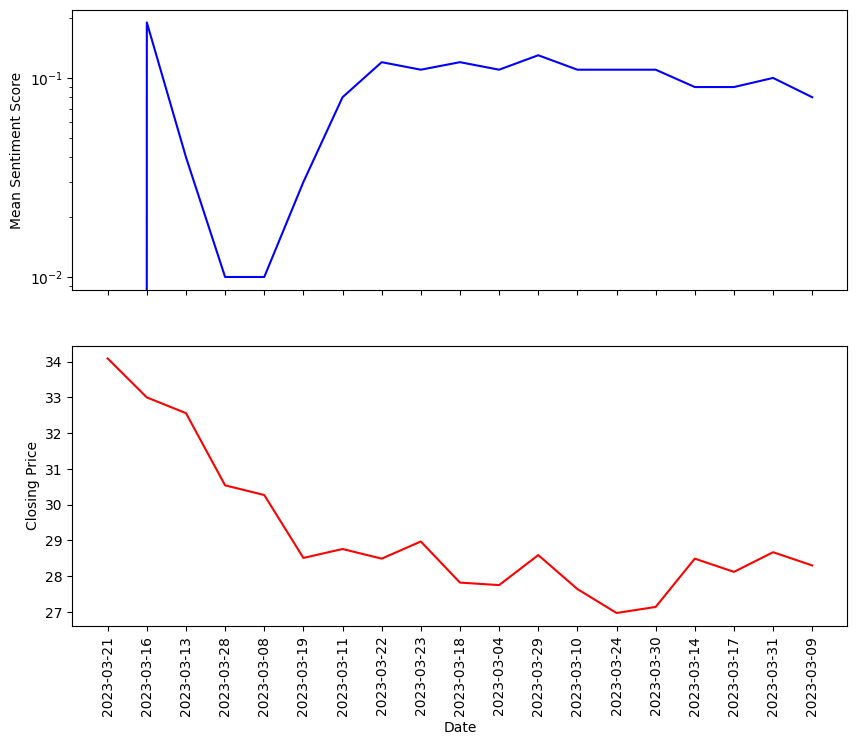

In [272]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8)) 

ax1.plot(BAC_Sentiment_Scores['Date'], BAC_Sentiment_Scores['Mean'], color='blue')
ax1.set_yscale('log')
ax1.set_ylabel('Mean Sentiment Score')

ax2.plot(BAC_Sentiment_Scores['Date'], BAC_Sentiment_Scores['Adjclose'], color='red')
ax2.set_ylabel('Closing Price')

plt.xlabel('Date')

plt.xticks(rotation='vertical')

plt.show()


**For Best Buy Co., Inc Ticker**

In [273]:
# for Stock Price Estimation and News related to Apple, limiting the company list to two - Apple Inc and Apple Inc_
c_name = ['Best Buy Co., Inc']
print('\nThe news data available for Best Buy for 30 days, and consolidated by news per company is',len(dict_files['Best Buy Co., Inc']), 'in number')


The news data available for Best Buy for 30 days, and consolidated by news per company is 26 in number


In [274]:
# Sentiment Scores for every day data within the directory - 'Best Buy Co., Inc'

BBY_Sentiment_Scores = pd.DataFrame()
for i in c_name:
  BBY_Sentiment_Scores = BBY_Sentiment_Scores.append(myread_csv(i))
BBY_Sentiment_Scores = BBY_Sentiment_Scores.reset_index(drop=True)
BBY_Sentiment_Scores.index = BBY_Sentiment_Scores.index + 1

print('\n\nHere are the Mean Sentiment Polarity Scores for News with respect to Best Buy \n')
BBY_Sentiment_Scores

For the following data: 
 0    HKTDC Twin Jewellery Shows Attract Exhibitors ...
1    SanctuaryA woman, an elephant, and their uncom...
0    Roku and Best Buy Help Create Better TV Experi...
1    More than $70 billion is wiped off crypto mark...
Name: Concat, dtype: object

Sample values of Polarity Scores: 
      neg    neu    pos  compound
0  0.000  0.883  0.117    0.5994
1  0.000  0.756  0.244    0.6369
2  0.000  0.691  0.309    0.9081
3  0.163  0.837  0.000   -0.7783


Here are the Mean Sentiment Polarity Scores for News with respect to Best Buy 



,Date,Mean
1,2023-03-05,0.62
2,2023-03-10,0.34
3,2023-03-04,0.28
4,2023-03-06,0.35
5,2023-03-11,0.42
6,2023-03-12,0.44
7,2023-03-30,0.48
8,2023-04-01,0.44
9,2023-03-14,0.42
10,2023-03-17,0.39


In [275]:
# importing stock price data from yahoo finance
from yahoo_fin import stock_info as si
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

# taking the start and end dates as per the news data
start_date = min(BBY_Sentiment_Scores['Date'])
end_date = max(BBY_Sentiment_Scores['Date'])

# getting the stock price data for Apple
ticker = "BBY"
stock_data_all = si.get_data(ticker, start_date=start_date, end_date=end_date, interval='1d')

In [276]:
# resetting index
stock_data_all = stock_data_all.reset_index()
stock_data_all.index = stock_data_all.index + 1
stock_data_all

,index,open,high,low,close,adjclose,volume,ticker
1,2023-03-06,83.800003,84.309998,82.120003,82.300003,81.326416,2503700,BBY
2,2023-03-07,82.900002,83.580002,82.059998,82.260002,81.286888,1889400,BBY
3,2023-03-08,82.129997,82.260002,79.820000,81.150002,80.190018,2018500,BBY
4,2023-03-09,81.370003,81.580002,78.889999,79.000000,78.065453,2051400,BBY
5,2023-03-10,78.919998,79.639999,77.690002,78.610001,77.680069,2172200,BBY
6,2023-03-13,76.809998,77.480003,75.669998,75.769997,74.873657,3794700,BBY
7,2023-03-14,76.769997,76.879997,74.050003,74.839996,73.954659,3326700,BBY
8,2023-03-15,73.489998,75.570000,73.209999,75.550003,74.656265,3135300,BBY
9,2023-03-16,74.709999,77.349998,74.599998,77.089996,76.178040,2949800,BBY
10,2023-03-17,77.050003,77.279999,75.459999,76.730003,75.822311,7806000,BBY


In [277]:
# resetting column names and date format
new_column = {'index':'Date', 'open':'Open','high':'High', 'low':'Low','close':'Close','adjclose':'Adjclose','volume':'Volume','ticker':'Ticker'}
stock_data_all = stock_data_all.rename(columns=new_column)
import datetime
for i in stock_data_all['Date']:
  date_obj = i
  date_str = date_obj.strftime('%Y-%m-%d')
  stock_data_all['Date'] = date_str

In [278]:
for i in BBY_Sentiment_Scores['Date']:
  for j in stock_data_all['Date']:
    # print(i,j)
    if i == str(j):
      BBY_Sentiment_Scores['Open'] = stock_data_all['Open']
      BBY_Sentiment_Scores['Adjclose'] = stock_data_all['Adjclose']
      BBY_Sentiment_Scores['High'] = stock_data_all['High']
      BBY_Sentiment_Scores['Low'] = stock_data_all['Low']
      BBY_Sentiment_Scores['Close'] = stock_data_all['Close']
      BBY_Sentiment_Scores['Volume'] = stock_data_all['Volume']   

print('\n\nThe Sentiment Scores Concatenated with the Stock Price Data for Best Buy \n')
BBY_Sentiment_Scores = BBY_Sentiment_Scores.dropna()
BBY_Sentiment_Scores



The Sentiment Scores Concatenated with the Stock Price Data for Best Buy 



,Date,Mean,Open,Adjclose,High,Low,Close,Volume
1,2023-03-05,0.62,83.800003,81.326416,84.309998,82.120003,82.300003,2503700.0
2,2023-03-10,0.34,82.900002,81.286888,83.580002,82.059998,82.260002,1889400.0
3,2023-03-04,0.28,82.129997,80.190018,82.260002,79.820000,81.150002,2018500.0
4,2023-03-06,0.35,81.370003,78.065453,81.580002,78.889999,79.000000,2051400.0
5,2023-03-11,0.42,78.919998,77.680069,79.639999,77.690002,78.610001,2172200.0
6,2023-03-12,0.44,76.809998,74.873657,77.480003,75.669998,75.769997,3794700.0
7,2023-03-30,0.48,76.769997,73.954659,76.879997,74.050003,74.839996,3326700.0
8,2023-04-01,0.44,73.489998,74.656265,75.570000,73.209999,75.550003,3135300.0
9,2023-03-14,0.42,74.709999,76.178040,77.349998,74.599998,77.089996,2949800.0
10,2023-03-17,0.39,77.050003,75.822311,77.279999,75.459999,76.730003,7806000.0


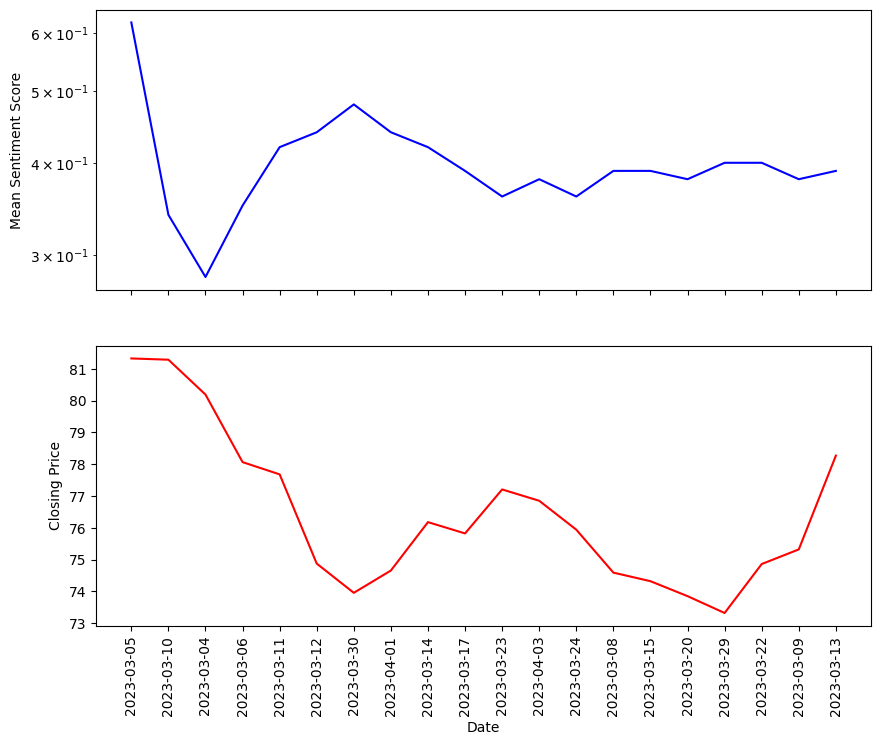

In [279]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8)) 

ax1.plot(BBY_Sentiment_Scores['Date'], BBY_Sentiment_Scores['Mean'], color='blue')
ax1.set_yscale('log')
ax1.set_ylabel('Mean Sentiment Score')

ax2.plot(BBY_Sentiment_Scores['Date'], BBY_Sentiment_Scores['Adjclose'], color='red')
ax2.set_ylabel('Closing Price')

plt.xlabel('Date')

plt.xticks(rotation='vertical')

plt.show()

**For The Boeing Company Ticker**

In [280]:
c_name = ['Amazon.com, Inc']
print('\nThe news data available for The Boeing Company for 30 days, and consolidated by news per day is',len(dict_files["The Boeing Company"]),'in number')


The news data available for The Boeing Company for 30 days, and consolidated by news per day is 28 in number


In [281]:
# Sentiment Scores for every day data within the directory - 'The Boeing Company'

BA_Sentiment_Scores = pd.DataFrame()
for i in c_name:
  BA_Sentiment_Scores = BA_Sentiment_Scores.append(myread_csv(i))
BA_Sentiment_Scores = BA_Sentiment_Scores.reset_index(drop=True)
BA_Sentiment_Scores.index = BA_Sentiment_Scores.index + 1

print('\n\nHere are the Mean Sentiment Polarity Scores for News with respect to The Boeing Company\n')
BA_Sentiment_Scores

For the following data: 
 0    AI Stocks To Watch In 2023Put eyes on these AI...
1    Else Nutrition Reports an 82% increase in Fisc...
0    ICT Investment In Government Global Market Rep...
1    Laird Superfood, Inc. (AMEX:LSF) Q4 2022 Earni...
2    Amazon class action lawsuit goes after company...
Name: Concat, dtype: object

Sample values of Polarity Scores: 
      neg    neu    pos  compound
0  0.000  1.000  0.000    0.0000
1  0.000  0.938  0.062    0.3182
2  0.000  0.796  0.204    0.7717
3  0.000  0.849  0.151    0.6705
4  0.059  0.836  0.105    0.1280


Here are the Mean Sentiment Polarity Scores for News with respect to The Boeing Company



,Date,Mean
1,2023-03-31,0.16
2,2023-03-17,0.38
3,2023-03-14,0.53
4,2023-03-16,0.50
5,2023-03-07,0.42
6,2023-03-30,0.25
7,2023-03-18,0.26
8,2023-03-06,0.31
9,2023-03-13,0.34
10,2023-03-28,0.34


In [282]:
# importing stock price data from yahoo finance
from yahoo_fin import stock_info as si
import yfinance as yf
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime

# taking the start and end dates as per the news data
start_date = min(BA_Sentiment_Scores['Date'])
end_date = max(BA_Sentiment_Scores['Date'])

# getting the stock price data for The Boeing Company
ticker = "BA"
stock_data_all = si.get_data(ticker, start_date=start_date, end_date=end_date, interval='1d')

In [283]:
# resetting index
stock_data_all = stock_data_all.reset_index()
stock_data_all.index = stock_data_all.index + 1
stock_data_all

,index,open,high,low,close,adjclose,volume,ticker
1,2023-03-06,214.119995,214.750000,209.600006,211.919998,211.919998,7004400,BA
2,2023-03-07,211.309998,213.179993,207.779999,207.919998,207.919998,4619700,BA
3,2023-03-08,208.250000,208.880005,205.940002,207.199997,207.199997,2406900,BA
4,2023-03-09,208.320007,209.020004,200.300003,201.240005,201.240005,4284000,BA
5,2023-03-10,201.429993,205.000000,197.789993,203.070007,203.070007,8547100,BA
6,2023-03-13,200.199997,207.080002,197.110001,203.369995,203.369995,6671200,BA
7,2023-03-14,207.529999,213.559998,205.000000,207.279999,207.279999,8245700,BA
8,2023-03-15,201.919998,202.210007,192.410004,198.210007,198.210007,10894200,BA
9,2023-03-16,196.210007,203.910004,194.429993,203.190002,203.190002,6747300,BA
10,2023-03-17,201.350006,202.830002,199.000000,201.050003,201.050003,9858900,BA


In [284]:
# resetting column names and date format
new_column = {'index':'Date', 'open':'Open','high':'High', 'low':'Low','close':'Close','adjclose':'Adjclose','volume':'Volume','ticker':'Ticker'}
stock_data_all = stock_data_all.rename(columns=new_column)
import datetime
for i in stock_data_all['Date']:
  date_obj = i
  date_str = date_obj.strftime('%Y-%m-%d')
  stock_data_all['Date'] = date_str

In [285]:
for i in BA_Sentiment_Scores['Date']:
  for j in stock_data_all['Date']:
    # print(i,j)
    if i == str(j):
      BA_Sentiment_Scores['Open'] = stock_data_all['Open']
      BA_Sentiment_Scores['Adjclose'] = stock_data_all['Adjclose']
      BA_Sentiment_Scores['High'] = stock_data_all['High']
      BA_Sentiment_Scores['Low'] = stock_data_all['Low']
      BA_Sentiment_Scores['Close'] = stock_data_all['Close']
      BA_Sentiment_Scores['Volume'] = stock_data_all['Volume']   

print('\n\nThe Sentiment Scores Concatenated with the Stock Price Data for The Boeing Company \n')
BA_Sentiment_Scores = BA_Sentiment_Scores.dropna()
BA_Sentiment_Scores



The Sentiment Scores Concatenated with the Stock Price Data for The Boeing Company 



,Date,Mean,Open,Adjclose,High,Low,Close,Volume
1,2023-03-31,0.16,214.119995,211.919998,214.750000,209.600006,211.919998,7004400.0
2,2023-03-17,0.38,211.309998,207.919998,213.179993,207.779999,207.919998,4619700.0
3,2023-03-14,0.53,208.250000,207.199997,208.880005,205.940002,207.199997,2406900.0
4,2023-03-16,0.50,208.320007,201.240005,209.020004,200.300003,201.240005,4284000.0
5,2023-03-07,0.42,201.429993,203.070007,205.000000,197.789993,203.070007,8547100.0
6,2023-03-30,0.25,200.199997,203.369995,207.080002,197.110001,203.369995,6671200.0
7,2023-03-18,0.26,207.529999,207.279999,213.559998,205.000000,207.279999,8245700.0
8,2023-03-06,0.31,201.919998,198.210007,202.210007,192.410004,198.210007,10894200.0
9,2023-03-13,0.34,196.210007,203.190002,203.910004,194.429993,203.190002,6747300.0
10,2023-03-28,0.34,201.350006,201.050003,202.830002,199.000000,201.050003,9858900.0


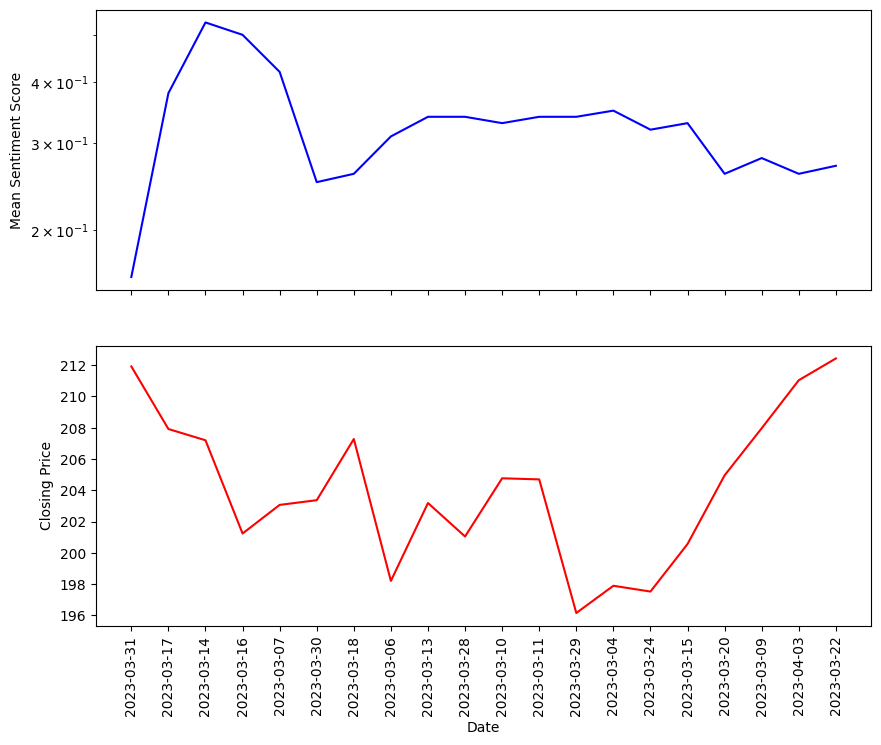

In [286]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8)) 

ax1.plot(BA_Sentiment_Scores['Date'], BA_Sentiment_Scores['Mean'], color='blue')
ax1.set_yscale('log')
ax1.set_ylabel('Mean Sentiment Score')

ax2.plot(BA_Sentiment_Scores['Date'], BA_Sentiment_Scores['Adjclose'], color='red')
ax2.set_ylabel('Closing Price')

plt.xlabel('Date')

plt.xticks(rotation='vertical')

plt.show()

Using these three company news and stock price data, let us now create a classification algorithm based on the obtained Sentiment Scores and their respective opening and closing prices. 

The aim of the classification model is to predict that given the Sentiment Score and the Opening Value, if we can predict the stock price to close at higher (bullish) or lower (bearish) value.

In [307]:
# to concatenate all the three dataframes into one and preprocess it

df = pd.concat([AAPL_Sentiment_Scores, AMZN_Sentiment_Scores, BAC_Sentiment_Scores, BBY_Sentiment_Scores, BA_Sentiment_Scores])

In [308]:
df.shape

(99, 8)

To convert this dataframe suitable for running classification models, converting the Adjclose column to target based on the difference in the opening and closing price and dropping the close column

In [309]:
df['Difference'] = df['Adjclose'] - df['Open'] # Shows the difference between the opening and closing price values
# df['Output'] = df['Difference'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
df['Volatility'] = df['High'] - df['Low'] # Shows the voltatility of the stock for the day, difference between high and low
df['Max_Peak_of_the_day'] = df['High'] - df['Open'] # Shows the difference between the highest price of the day and the opening price of the day
df['Max_Dip_of_the_day'] = df['Open'] - df['Low'] # Shows the difference between the opening price of the day and the lowest price of the day 
df.head()

,Date,Mean,Open,Adjclose,High,Low,Close,Volume,Difference,Volatility,Max_Peak_of_the_day,Max_Dip_of_the_day
1,2023-03-11,0.66,153.789993,153.830002,156.300003,153.460007,153.830002,87558000.0,0.040009,2.839996,2.510010,0.329987
2,2023-03-29,0.23,153.699997,151.600006,154.029999,151.130005,151.600006,56182000.0,-2.099991,2.899994,0.330002,2.569992
3,2023-03-27,0.18,152.809998,152.869995,153.470001,151.830002,152.869995,47204800.0,0.059998,1.639999,0.660004,0.979996
4,2023-03-25,0.20,153.559998,150.589996,154.539993,150.229996,150.589996,53833600.0,-2.970001,4.309998,0.979996,3.330002
5,2023-03-17,0.22,150.210007,148.500000,150.940002,147.610001,148.500000,68572400.0,-1.710007,3.330002,0.729996,2.600006


In [310]:
df = df.drop(['Adjclose','Close','Date'], axis = 1)

In [311]:
df.head()

,Mean,Open,High,Low,Volume,Difference,Volatility,Max_Peak_of_the_day,Max_Dip_of_the_day
1,0.66,153.789993,156.300003,153.460007,87558000.0,0.040009,2.839996,2.510010,0.329987
2,0.23,153.699997,154.029999,151.130005,56182000.0,-2.099991,2.899994,0.330002,2.569992
3,0.18,152.809998,153.470001,151.830002,47204800.0,0.059998,1.639999,0.660004,0.979996
4,0.20,153.559998,154.539993,150.229996,53833600.0,-2.970001,4.309998,0.979996,3.330002
5,0.22,150.210007,150.940002,147.610001,68572400.0,-1.710007,3.330002,0.729996,2.600006


In [312]:
df.isna().sum()

Mean                   0
Open                   0
High                   0
Low                    0
Volume                 0
Difference             0
Volatility             0
Max_Peak_of_the_day    0
Max_Dip_of_the_day     0
dtype: int64

In [313]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()
volume = df['Volume'].values.reshape(-1, 1)
normalized_volume = scaler.fit_transform(volume)

df['Normalized_Volume'] = normalized_volume

df.head()

,Mean,Open,High,Low,Volume,Difference,Volatility,Max_Peak_of_the_day,Max_Dip_of_the_day,Normalized_Volume
1,0.66,153.789993,156.300003,153.460007,87558000.0,0.040009,2.839996,2.510010,0.329987,0.396512
2,0.23,153.699997,154.029999,151.130005,56182000.0,-2.099991,2.899994,0.330002,2.569992,0.251799
3,0.18,152.809998,153.470001,151.830002,47204800.0,0.059998,1.639999,0.660004,0.979996,0.210394
4,0.20,153.559998,154.539993,150.229996,53833600.0,-2.970001,4.309998,0.979996,3.330002,0.240967
5,0.22,150.210007,150.940002,147.610001,68572400.0,-1.710007,3.330002,0.729996,2.600006,0.308946


In [314]:
df = df.drop('Volume', axis = 1)

In [315]:
from sklearn.cluster import KMeans
import pandas as pd

kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(df)

labels = kmeans.labels_

data_with_clusters = df.copy()
data_with_clusters['Cluster'] = labels

In [316]:
data_with_clusters

,Mean,Open,High,Low,Difference,Volatility,Max_Peak_of_the_day,Max_Dip_of_the_day,Normalized_Volume,Cluster
1,0.66,153.789993,156.300003,153.460007,0.040009,2.839996,2.510010,0.329987,0.396512,1
2,0.23,153.699997,154.029999,151.130005,-2.099991,2.899994,0.330002,2.569992,0.251799,1
3,0.18,152.809998,153.470001,151.830002,0.059998,1.639999,0.660004,0.979996,0.210394,1
4,0.20,153.559998,154.539993,150.229996,-2.970001,4.309998,0.979996,3.330002,0.240967,1
5,0.22,150.210007,150.940002,147.610001,-1.710007,3.330002,0.729996,2.600006,0.308946,1
...,...,...,...,...,...,...,...,...,...,...
16,0.33,198.630005,201.550003,198.630005,1.940002,2.919998,2.919998,0.000000,0.010624,3
17,0.26,200.820007,206.300003,200.490005,4.139999,5.809998,5.479996,0.330002,0.017860,3
18,0.28,206.500000,208.649994,205.880005,1.470001,2.769989,2.149994,0.619995,0.009150,3
19,0.26,208.970001,212.869995,206.520004,2.069992,6.349991,3.899994,2.449997,0.023039,3


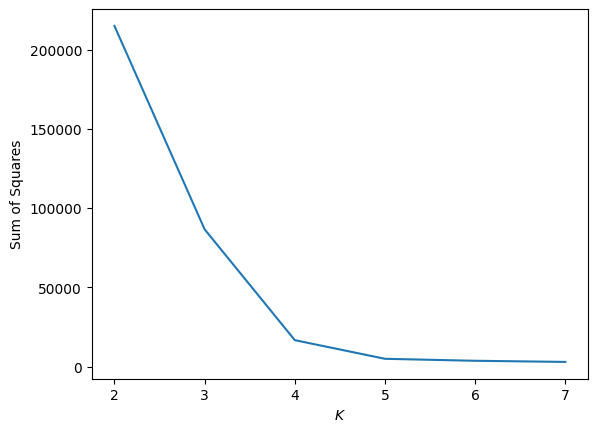

In [317]:
from sklearn import cluster
import numpy as np

sse = []
krange = list(range(2,8))
X = df.values
for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=3)
    model.fit_predict(X)
    cluster_assignments = model.labels_
    centers = model.cluster_centers_
    sse.append(np.sum((X - centers[cluster_assignments]) ** 2))

plt.plot(krange, sse)
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")
plt.show()

In [318]:
kmeans = KMeans(n_clusters=4).fit(df)

data_with_clusters['Cluster'] = kmeans.labels_

data_with_clusters

,Mean,Open,High,Low,Difference,Volatility,Max_Peak_of_the_day,Max_Dip_of_the_day,Normalized_Volume,Cluster
1,0.66,153.789993,156.300003,153.460007,0.040009,2.839996,2.510010,0.329987,0.396512,1
2,0.23,153.699997,154.029999,151.130005,-2.099991,2.899994,0.330002,2.569992,0.251799,1
3,0.18,152.809998,153.470001,151.830002,0.059998,1.639999,0.660004,0.979996,0.210394,1
4,0.20,153.559998,154.539993,150.229996,-2.970001,4.309998,0.979996,3.330002,0.240967,1
5,0.22,150.210007,150.940002,147.610001,-1.710007,3.330002,0.729996,2.600006,0.308946,1
...,...,...,...,...,...,...,...,...,...,...
16,0.33,198.630005,201.550003,198.630005,1.940002,2.919998,2.919998,0.000000,0.010624,2
17,0.26,200.820007,206.300003,200.490005,4.139999,5.809998,5.479996,0.330002,0.017860,2
18,0.28,206.500000,208.649994,205.880005,1.470001,2.769989,2.149994,0.619995,0.009150,2
19,0.26,208.970001,212.869995,206.520004,2.069992,6.349991,3.899994,2.449997,0.023039,2


In [325]:
cluster1_metrics = kmeans.cluster_centers_[0]
cluster2_metrics = kmeans.cluster_centers_[1]
cluster3_metrics = kmeans.cluster_centers_[2]
cluster4_metrics = kmeans.cluster_centers_[3]

data = [cluster1_metrics, cluster2_metrics, cluster3_metrics, cluster4_metrics]
cluster_center_df = pd.DataFrame(data)

cluster_center_df.columns = data_with_clusters.columns[:-1]
cluster_center_df

,Mean,Open,High,Low,Difference,Volatility,Max_Peak_of_the_day,Max_Dip_of_the_day,Normalized_Volume
0,0.041579,29.530526,29.895790,28.808421,-0.336842,1.087369,0.365264,0.722105,0.451840
1,0.257000,155.661001,157.565001,154.415500,0.435999,3.149501,1.904000,1.245501,0.302113
2,0.328500,204.140500,207.061001,201.105000,-0.016499,5.956001,2.920501,3.035500,0.020685
3,0.364500,87.037500,88.275250,85.759250,-0.289013,2.516000,1.237750,1.278250,0.135727


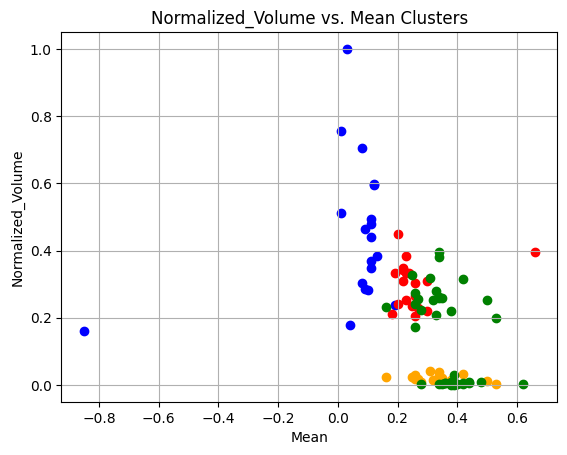

In [330]:
plt.scatter(
    data_with_clusters.loc[data_with_clusters['Cluster'] == 0]['Mean'], 
    data_with_clusters.loc[data_with_clusters['Cluster'] == 0]['Normalized_Volume'],
    c='blue')

plt.scatter(
    data_with_clusters.loc[data_with_clusters['Cluster'] == 1]['Mean'], 
    data_with_clusters.loc[data_with_clusters['Cluster'] == 1]['Normalized_Volume'],
    c='red')

plt.scatter(
    data_with_clusters.loc[data_with_clusters['Cluster'] == 2]['Mean'], 
    data_with_clusters.loc[data_with_clusters['Cluster'] == 2]['Normalized_Volume'],
    c='orange')

plt.scatter(
    data_with_clusters.loc[data_with_clusters['Cluster'] == 3]['Mean'], 
    data_with_clusters.loc[data_with_clusters['Cluster'] == 3]['Normalized_Volume'],
    c='green')


plt.title('Normalized_Volume vs. Mean Clusters')
plt.xlabel('Mean')
plt.ylabel('Normalized_Volume')

plt.grid()
plt.show()

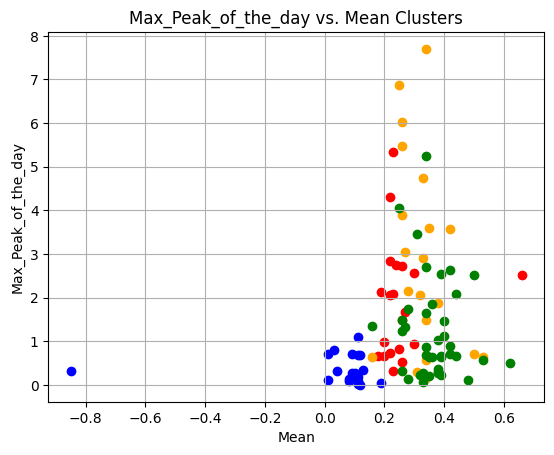

In [331]:
plt.scatter(
    data_with_clusters.loc[data_with_clusters['Cluster'] == 0]['Mean'], 
    data_with_clusters.loc[data_with_clusters['Cluster'] == 0]['Max_Peak_of_the_day'],
    c='blue')

plt.scatter(
    data_with_clusters.loc[data_with_clusters['Cluster'] == 1]['Mean'], 
    data_with_clusters.loc[data_with_clusters['Cluster'] == 1]['Max_Peak_of_the_day'],
    c='red')

plt.scatter(
    data_with_clusters.loc[data_with_clusters['Cluster'] == 2]['Mean'], 
    data_with_clusters.loc[data_with_clusters['Cluster'] == 2]['Max_Peak_of_the_day'],
    c='orange')

plt.scatter(
    data_with_clusters.loc[data_with_clusters['Cluster'] == 3]['Mean'], 
    data_with_clusters.loc[data_with_clusters['Cluster'] == 3]['Max_Peak_of_the_day'],
    c='green')


plt.title('Max_Peak_of_the_day vs. Mean Clusters')
plt.xlabel('Mean')
plt.ylabel('Max_Peak_of_the_day')

plt.grid()
plt.show()

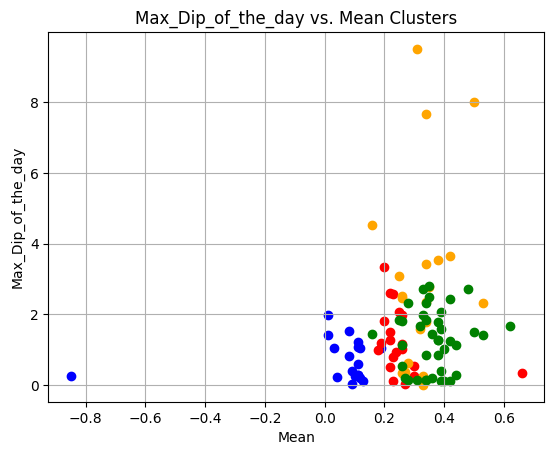

In [332]:
plt.scatter(
    data_with_clusters.loc[data_with_clusters['Cluster'] == 0]['Mean'], 
    data_with_clusters.loc[data_with_clusters['Cluster'] == 0]['Max_Dip_of_the_day'],
    c='blue')

plt.scatter(
    data_with_clusters.loc[data_with_clusters['Cluster'] == 1]['Mean'], 
    data_with_clusters.loc[data_with_clusters['Cluster'] == 1]['Max_Dip_of_the_day'],
    c='red')

plt.scatter(
    data_with_clusters.loc[data_with_clusters['Cluster'] == 2]['Mean'], 
    data_with_clusters.loc[data_with_clusters['Cluster'] == 2]['Max_Dip_of_the_day'],
    c='orange')

plt.scatter(
    data_with_clusters.loc[data_with_clusters['Cluster'] == 3]['Mean'], 
    data_with_clusters.loc[data_with_clusters['Cluster'] == 3]['Max_Dip_of_the_day'],
    c='green')


plt.title('Max_Dip_of_the_day vs. Mean Clusters')
plt.xlabel('Mean')
plt.ylabel('Max_Dip_of_the_day')

plt.grid()
plt.show()

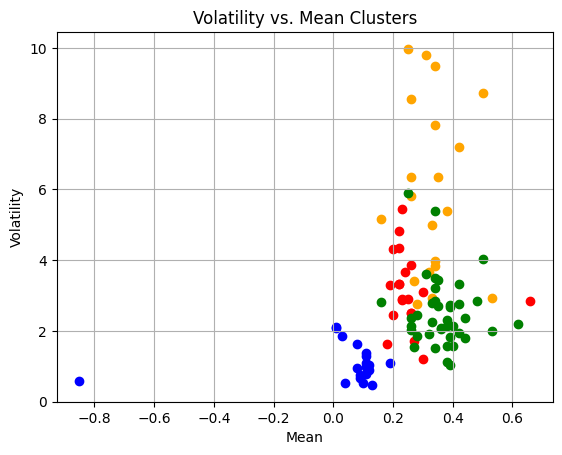

In [333]:
plt.scatter(
    data_with_clusters.loc[data_with_clusters['Cluster'] == 0]['Mean'], 
    data_with_clusters.loc[data_with_clusters['Cluster'] == 0]['Volatility'],
    c='blue')

plt.scatter(
    data_with_clusters.loc[data_with_clusters['Cluster'] == 1]['Mean'], 
    data_with_clusters.loc[data_with_clusters['Cluster'] == 1]['Volatility'],
    c='red')

plt.scatter(
    data_with_clusters.loc[data_with_clusters['Cluster'] == 2]['Mean'], 
    data_with_clusters.loc[data_with_clusters['Cluster'] == 2]['Volatility'],
    c='orange')

plt.scatter(
    data_with_clusters.loc[data_with_clusters['Cluster'] == 3]['Mean'], 
    data_with_clusters.loc[data_with_clusters['Cluster'] == 3]['Volatility'],
    c='green')


plt.title('Volatility vs. Mean Clusters')
plt.xlabel('Mean')
plt.ylabel('Volatility')

plt.grid()
plt.show()

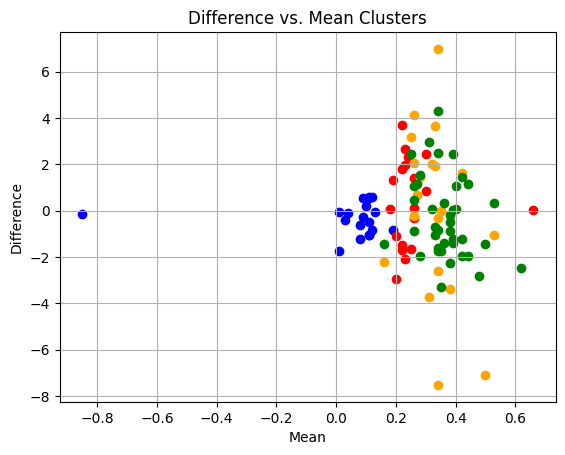

In [334]:
plt.scatter(
    data_with_clusters.loc[data_with_clusters['Cluster'] == 0]['Mean'], 
    data_with_clusters.loc[data_with_clusters['Cluster'] == 0]['Difference'],
    c='blue')

plt.scatter(
    data_with_clusters.loc[data_with_clusters['Cluster'] == 1]['Mean'], 
    data_with_clusters.loc[data_with_clusters['Cluster'] == 1]['Difference'],
    c='red')

plt.scatter(
    data_with_clusters.loc[data_with_clusters['Cluster'] == 2]['Mean'], 
    data_with_clusters.loc[data_with_clusters['Cluster'] == 2]['Difference'],
    c='orange')

plt.scatter(
    data_with_clusters.loc[data_with_clusters['Cluster'] == 3]['Mean'], 
    data_with_clusters.loc[data_with_clusters['Cluster'] == 3]['Difference'],
    c='green')


plt.title('Difference vs. Mean Clusters')
plt.xlabel('Mean')
plt.ylabel('Difference')

plt.grid()
plt.show()